<a href="https://colab.research.google.com/github/AlexMont/GestureClassifer/blob/master/GesturesClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GESTURE SIGN CLASSIFIER**
In this project, a classifier is built and the objective is to determine if a gesture is positive or negative.

**Mounting the data:**

First step is to mount the dataset in the Drive. To do that, you can either run the code below or click on this button on top left:

![alt text](https://drive.google.com/uc?export=view&id=16WcAi8PHVj3e_txgQ0281X9ffLndK0qL)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Preparing the Data:**

This first lines of code ensure that any edits to libraries are reloaded  automatically, and also that any charts or images displayed are shown in this notebook.

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Then, import all libraries and packages that will be used.


In [ ]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import *
from fastai.callbacks.hooks import *
from pathlib import Path

Here, I specify the root directory and the base directory that are the path for the data.

Also, I set the batch size (bs) and normalize the size of the images.

In [32]:
root_dir = "/content/drive/My Drive/"
base_dir = root_dir + 'Data/'
bs = 64
size = 224
path = Path(base_dir)

Then, I just check the path and its contents.

In [ ]:
path.ls()

[PosixPath('/content/drive/My Drive/Data/THUMBSUP'),
 PosixPath('/content/drive/My Drive/Data/THUMBSDOWN'),
 PosixPath('/content/drive/My Drive/Data/models')]

In the codes below, I specify the two classes: 

THUMBSUP for positive gestures and THUMBSDOWN for negative gestures.

Also, I check if the images have any problem.

In [ ]:
classes = ['THUMBSUP', 'THUMBSDOWN']

In [ ]:
for c in classes:    
    verify_images(path/c, delete=True, max_size=500)
print ("There are", len(classes), "classes:\n", classes)  

There are 2 classes:
 ['THUMBSUP', 'THUMBSDOWN']


Now, the image data bunch is created.

The function creates two datasets: Train and Validation

Of all images, 20% are separated for the validation dataset and 80% for the training dataset.

Also, the pixel values are normalized.

In [33]:
np.random.seed(2)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=size, bs=bs).normalize(imagenet_stats)

In [ ]:
data.classes

['THUMBSDOWN', 'THUMBSUP']

Let's see some examples of the data buch created, with its labels:

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

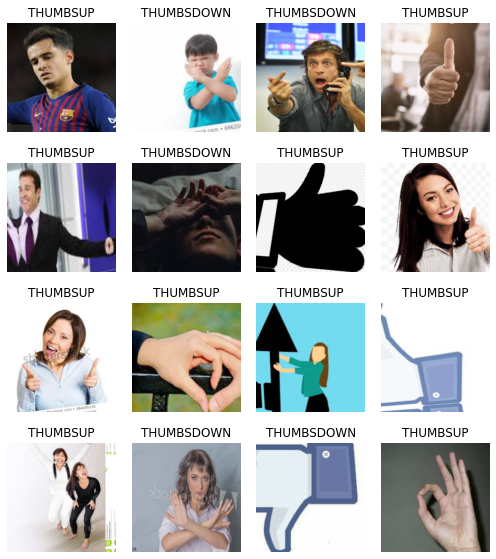

In [ ]:
data.show_batch(rows=4, figsize=(7,8))

Just to check the total number of images.

In [ ]:
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 419 training images and 104 validation images.


**Training**

In the first step of the training part, I specified the learner, or the Neural Network model used and the metrics to measure the results of training process.

The model is ... and its architecture can be seen below.



In [34]:
learn = cnn_learner(data, models.densenet169, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/checkpoints/densenet169-b2777c0a.pth


In [ ]:
learn.model

Now, I find the best range of learning rates to minimize the loss at training time.

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


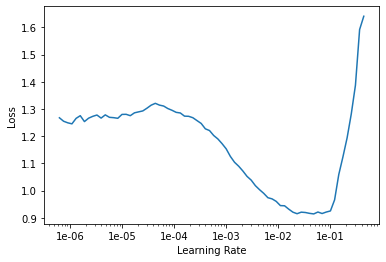

In [35]:
learn.lr_find()
learn.recorder.plot()

Now, the training starts.

With this command *learn.fit_one_cycle*, the learning rate is dynamic and adapts to the data. So, I set the range of appropriate learning rates according to the previous step and train the model for 10 epochs and the, save the parameters or weights.

epoch,train_loss,valid_loss,accuracy,time
0,1.745430,4.008422,0.567308,00:14
1,1.353773,2.512895,0.634615,00:11
2,1.392256,2.386475,0.692308,00:11
3,1.359579,2.811803,0.615385,00:11
4,1.195676,1.831696,0.692308,00:11
5,1.065004,1.128376,0.721154,00:11
6,0.915511,0.928435,0.778846,00:11
7,0.785067,1.100173,0.721154,00:11
8,0.679218,0.969517,0.769231,00:11
9,0.599443,0.895099,0.798077,00:11


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

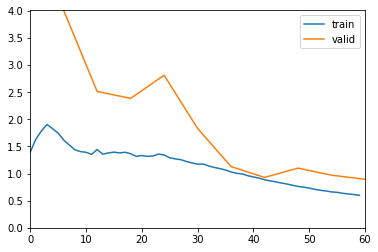

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [36]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,1e-1), callbacks=[ShowGraph(learn)])

In [38]:
learn.save('stage-1')

In [37]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "


True

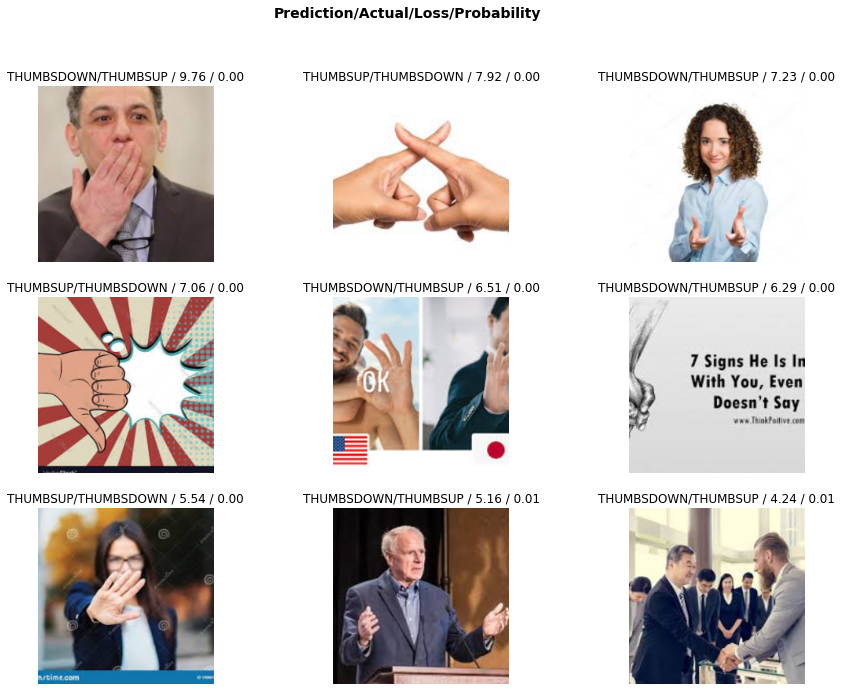

In [39]:
interp.plot_top_losses(9, figsize=(15,11))

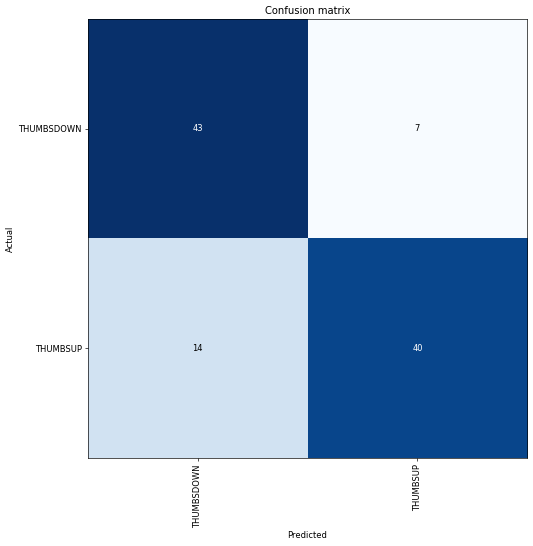

In [41]:
interp.plot_confusion_matrix(figsize=(9,9), dpi=60)

In [42]:
interp.most_confused(min_val=2)

[('THUMBSUP', 'THUMBSDOWN', 14), ('THUMBSDOWN', 'THUMBSUP', 7)]

**Fine-Tunning**

In this step, I try to get better results by fine-tunning the classifier.

This is done fistrly unfreezing the first layers of the ...

Now, I train again using all layers of the model.
In the first training process, the initial layers were freezed and the wieghts used were the ones where this model was previously trained.

In [43]:
learn.unfreeze()

In [ ]:
learn.load('stage-1');

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


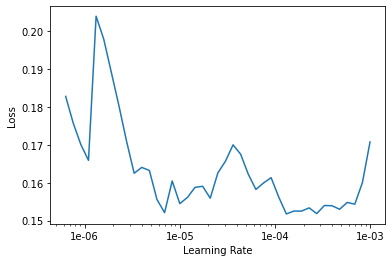

In [44]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,0.211522,0.861773,0.798077,00:13
1,0.164811,0.873066,0.798077,00:13
2,0.168745,0.926668,0.788462,00:13
3,0.166541,0.901300,0.817308,00:13
4,0.164214,0.955934,0.798077,00:13
5,0.145895,0.991273,0.788462,00:13
6,0.147064,1.034951,0.798077,00:13
7,0.139124,1.077434,0.798077,00:13
8,0.124113,1.096274,0.807692,00:13
9,0.138191,1.103696,0.807692,00:13


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

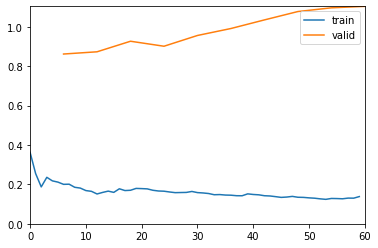

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

In [45]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4), callbacks=[ShowGraph(learn)])

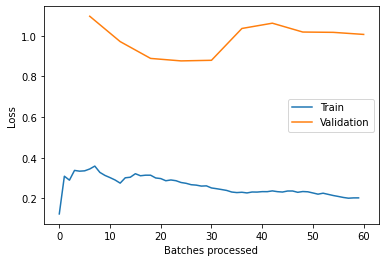

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.save('stage-2')

In [ ]:
learn.load('stage-2');

The next step is to validate training results.
So, we check the main losses over the validation dataset.

The first class is the one predicted, the second is the actual class. Then, the loss value and the probability of the image to be of the actual class.

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/u

True

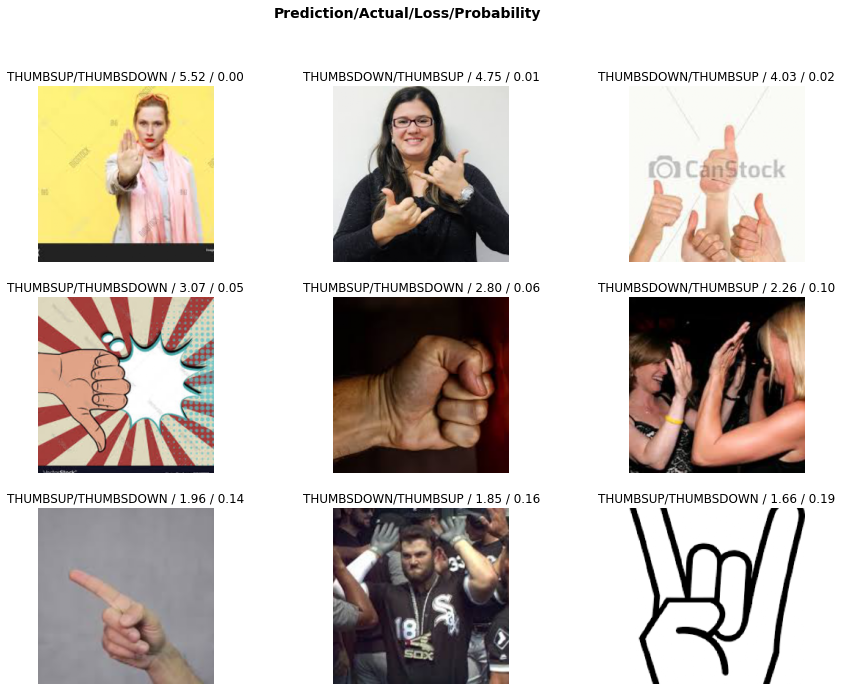

In [ ]:
interp.plot_top_losses(9, figsize=(15,11))

The confusion matrix is a good visual metric to validate the results.

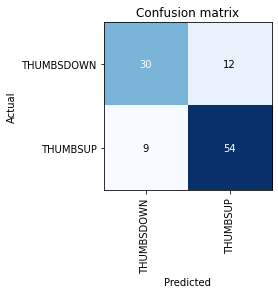

In [ ]:
interp.plot_confusion_matrix()

**Predicting**

In [ ]:
learn.export()